In [ ]:
# List of available devices

In [1]:
import tensorflow as tf

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [52]:
# Load and analysis of dataset

In [2]:
import pandas as pd

load_path = r"C:\Users\Dexp\Desktop\Интеллектуальные системы\ML lab1 LS TM\IMDB_Dataset_fixed.csv"
dataset = pd.read_csv(path)
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming te...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49581,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
dataset.duplicated().sum()

419

In [6]:
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

In [7]:
dataset.describe()

,review,sentiment
count,49581,49581
unique,49581,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [8]:
dataset.isna().sum(axis = 0)  

review       0
sentiment    0
dtype: int64

In [9]:
num_of_review_classes = dataset['sentiment'].nunique()
num_of_review_classes

2

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

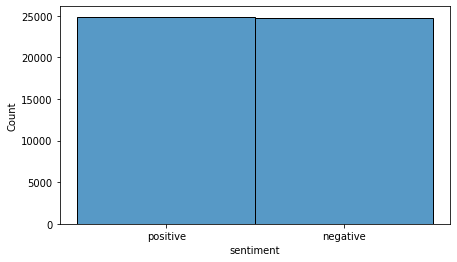

In [10]:
import matplotlib.pyplot as plt
import seaborn

plt.figure(figsize = (7, 4))
seaborn.histplot(dataset['sentiment'])

In [78]:
# Encoding non-numerical features

In [11]:
from sklearn.preprocessing import LabelEncoder

dataset_encoded = dataset.copy()

label_encoder = LabelEncoder()
dataset_encoded['sentiment'] = label_encoder.fit_transform(dataset_encoded['sentiment'])

dataset_encoded

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming te...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [13]:
reviews = dataset_encoded.drop(columns = 'sentiment')
sentiment = dataset_encoded['sentiment']

In [14]:
reviews

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming te...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [15]:
reviews_splitted = reviews["review"].str.split()
reviews_splitted

0        [One, of, the, other, reviewers, has, mentione...
1        [A, wonderful, little, production., The, filmi...
2        [I, thought, this, was, a, wonderful, way, to,...
3        [Basically, there's, a, family, where, a, litt...
4        [Petter, Mattei's, "Love, in, the, Time, of, M...
                               ...                        
49995    [I, thought, this, movie, did, a, down, right,...
49996    [Bad, plot,, bad, dialogue,, bad, acting,, idi...
49997    [I, am, a, Catholic, taught, in, parochial, el...
49998    [I'm, going, to, have, to, disagree, with, the...
49999    [No, one, expects, the, Star, Trek, movies, to...
Name: review, Length: 49581, dtype: object

In [16]:
sentiment

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49581, dtype: int32

In [17]:
# String vectorization

In [18]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews_splitted)
vocab_size = len(tokenizer.word_index) + 1
encoded_reviews = tokenizer.texts_to_sequences(reviews_splitted)
max_length = 200
padded_reviews = pad_sequences(encoded_reviews, maxlen = max_length, padding = 'post')

In [19]:
padded_reviews.shape

(49581, 200)

In [88]:
# Train and test sets

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(padded_reviews, sentiment, test_size = 0.2, random_state = 42, shuffle = True)
x_train_2, x_validation, y_train_2, y_validation = train_test_split(x_train, y_train, test_size = 0.05, random_state = 42)         

print(f'X train: {x_train.shape}')
print(f'Y train: {y_train.shape}')
print()
print(f'X test: {x_test.shape}')
print(f'Y test: {y_test.shape}')
print()
print(f'X validation: {x_validation.shape}')
print(f'Y validation: {y_validation.shape}')

X train: (39664, 200)
Y train: (39664,)

X test: (9917, 200)
Y test: (9917,)

X validation: (1984, 200)
Y validation: (1984,)


In [21]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical  = to_categorical(y_test)
y_validation_categorical  = to_categorical(y_validation)

print(f'Y train (categorical): {y_train_categorical.shape}')
print(f'Y test (categorical): {y_test_categorical.shape}')
print(f'Y validation (categorical): {y_validation_categorical.shape}')

Y train (categorical): (39664, 2)
Y test (categorical): (9917, 2)
Y validation (categorical): (1984, 2)


In [91]:
# Model build

In [22]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Embedding

dimension = 32
model1 = Sequential()
model1.add(Embedding(vocab_size, dimension, input_length = max_length))
# return_sequences = True, because one of the next layers is reccurent
model1.add(LSTM(128, return_sequences = True))
model1.add(Dropout(0.2))
model1.add(LSTM(128))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(num_of_review_classes, activation = 'softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           11694016  
                                                                 
 lstm (LSTM)                 (None, 200, 128)          82432     
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 2)                 1

In [24]:
import time
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 5, patience = 4)
tic = time.perf_counter()
model1.fit(x_train, y_train_categorical, epochs = 10, validation_data = (x_validation, y_validation_categorical), callbacks = [es])
toc = time.perf_counter()
print()
print(f"model.fit operation took {((toc - tic) / 60):0.2f} minutes")

_, accuracy = model1.evaluate(x_test, y_test_categorical)  

print()
print(f'Accuracy: {accuracy * 100:.2f}')

Epoch 1/10
1240/1240 [==============================] - 85s 69ms/step - loss: 0.6375 - accuracy: 0.6270 - val_loss: 0.4736 - val_accuracy: 0.7823
Epoch 2/10
1240/1240 [==============================] - 84s 68ms/step - loss: 0.6231 - accuracy: 0.6442 - val_loss: 0.4693 - val_accuracy: 0.8392
Epoch 3/10
1240/1240 [==============================] - 85s 68ms/step - loss: 0.3568 - accuracy: 0.8484 - val_loss: 0.1462 - val_accuracy: 0.9511
Epoch 4/10
1240/1240 [==============================] - 82s 66ms/step - loss: 0.1310 - accuracy: 0.9546 - val_loss: 0.0557 - val_accuracy: 0.9864
Epoch 5/10
1240/1240 [==============================] - 83s 67ms/step - loss: 0.0485 - accuracy: 0.9852 - val_loss: 0.0291 - val_accuracy: 0.9945
Epoch 6/10
1240/1240 [==============================] - 83s 67ms/step - loss: 0.0193 - accuracy: 0.9953 - val_loss: 0.0150 - val_accuracy: 0.9960
Epoch 7/10
1240/1240 [==============================] - 84s 68ms/step - loss: 0.0080 - accuracy: 0.9983 - val_loss: 0.0063 -

In [94]:
# Test

In [25]:
import numpy as np

keys = dataset_encoded['sentiment'].unique()
values = dataset['sentiment'].unique()
classes_dictionary = dict(zip(keys, values))
rights = 0
tests = 20
y_test_numpy = y_test.to_numpy()

for i in range(0, tests):
    n = np.random.randint(0, x_test.shape[0])
    argument = np.reshape(x_test[n], (1, x_test.shape[1]))
    value = y_test_numpy[n]
    prediction = np.argmax(model1.predict(argument), axis = 1)
    prediction_value = prediction[0]
    print(f"{n}) Original - {classes_dictionary[value]}; Predicted - {classes_dictionary[prediction_value]}")
    if (prediction_value == value):
        rights += 1
        print("RIGHT")
    else:
        print("WRONG")
    
print()
print(f"Percentage of right answers: {(rights / tests * 100):0.2f}")

1/1 [==============================] - 1s 1s/step
5517) Original - negative; Predicted - negative
RIGHT
1/1 [==============================] - 0s 49ms/step
3799) Original - positive; Predicted - negative
WRONG
1/1 [==============================] - 0s 52ms/step
5982) Original - positive; Predicted - positive
RIGHT
1/1 [==============================] - 0s 48ms/step
5418) Original - positive; Predicted - positive
RIGHT
1/1 [==============================] - 0s 46ms/step
8685) Original - positive; Predicted - positive
RIGHT
1/1 [==============================] - 0s 57ms/step
1734) Original - positive; Predicted - positive
RIGHT
1/1 [==============================] - 0s 51ms/step
5831) Original - negative; Predicted - negative
RIGHT
1/1 [==============================] - 0s 42ms/step
9560) Original - positive; Predicted - positive
RIGHT
1/1 [==============================] - 0s 43ms/step
2993) Original - negative; Predicted - negative
RIGHT
1/1 [==============================] - 0s 43ms/s

In [42]:
texts = tokenizer.sequences_to_texts(x_test.tolist())
texts[0]

'started out as. whoever plays the surviving secret service agent aboard the cruise ship was probably picked for the part because he looked most like johnny depp, not because of any display of talent. the chinese villains, representing both taiwan and mainland china, hiss and grin as they threaten the heroes. the script is pretty awful, recycled from other, better films. there is a lot of shooting aboard the ship and practically everyone winds up mincemeat. two thirds of the way through, the ship explodes into the expected series of fireballs. then the movie splits into two related parts. part one, another shootout, this time in a waterfront warehouse. part two, an exchange between the vice president, now acting president, and the oily chinese premiere, lifted out of both "dr. strangelove" and "fail safe." we unwittingly launch our missiles. they launch theirs in retaliation. we cannot convince them that our launch was accidental, even though we offer to help them destroy our own missi

In [46]:
wrongs = 0
threshold = 20
n = 0
indexes_of_reviews_with_wrong_predicted_values = []
while wrongs < threshold:
    if (n == x_test.shape[0]):
        break
    print(f"{n + 1} out of {x_test.shape[0]}")
    argument = np.reshape(x_test[n], (1, x_test.shape[1]))
    real_value = y_test_numpy[n]
    prediction = np.argmax(model1.predict(argument), axis = 1)
    predicted_value = prediction[0]
    if (predicted_value != real_value):
        indexes_of_reviews_with_wrong_predicted_values.append((n, predicted_value))
        wrongs += 1
    n += 1


print(indexes_of_reviews_with_wrong_predicted_values)
for i in range(0, len(indexes_of_reviews_with_wrong_predicted_values)):
    index = indexes_of_reviews_with_wrong_predicted_values[i][0]
    predicted_value = indexes_of_reviews_with_wrong_predicted_values[i][1]
    review = texts[index]
    real_value = y_test_numpy[index]
    print(f"Review: {review};\n\tOriginal sentiment: {real_value}, predicted sentiment: {predicted_value}\n")

[(7, 1), (8, 0), (10, 0), (15, 0), (36, 0), (40, 1), (45, 1), (49, 1), (53, 0), (57, 0), (59, 1), (78, 0), (83, 1), (85, 1), (86, 1), (87, 1), (95, 1), (98, 1), (102, 0), (112, 1)]
Review: want to see a thrilling action movie, don't watch it because you might lose the will to live halfway through. however, if you want a good laugh, please watch it! i even bought the chuck norris 3dvd collection thanks to my enjoyable saturday night. what especially struck me is that évery scene that would be expensive to make was copy-pasted from a discovery documentary or an old tv-special on the us army. furthermore i was amazed by the fact that they didn't put the slightest effort in making the production look real. afghanistan is, as far as i can remember, nowhere near any sea and yet with a single click deke escapes from the terrorists sand-castle with his jet-pack and is taken away by a submarine (probably discovery). later on in the movie, deke throws an islam terrorist against the wall. in the 

In [ ]:
# Loading and saving the model from files

In [26]:
save_path = r"C:\Users\Dexp\Desktop\LSTM_Reviews_Model"
model1.save(path)

INFO:tensorflow:Assets written to: C:\Users\Dexp\Desktop\LSTM_Reviews_Model\assets


INFO:tensorflow:Assets written to: C:\Users\Dexp\Desktop\LSTM_Reviews_Model\assets


In [31]:
from tensorflow import keras

model2 = keras.models.load_model(save_path)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           11694016  
                                                                 
 lstm (LSTM)                 (None, 200, 128)          82432     
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 2)                 1

In [ ]:
# Test of loaded model

In [33]:
import numpy as np

keys = dataset_encoded['sentiment'].unique()
values = dataset['sentiment'].unique()
classes_dictionary = dict(zip(keys, values))
rights = 0
tests = 20
y_test_numpy = y_test.to_numpy()

for i in range(0, tests):
    n = np.random.randint(0, x_test.shape[0])
    #n = i
    argument = np.reshape(x_test[n], (1, x_test.shape[1]))
    value = y_test_numpy[n]
    prediction = np.argmax(model2.predict(argument), axis = 1)
    prediction_value = prediction[0]
    print(f"{n}) Original - {classes_dictionary[value]}; Predicted - {classes_dictionary[prediction_value]}")
    if (prediction_value == value):
        rights += 1
        print("RIGHT")
    else:
        print("WRONG")
    
print()
print(f"Percentage of right answers: {(rights / tests * 100):0.2f}")

1/1 [==============================] - 0s 46ms/step
4470) Original - positive; Predicted - positive
RIGHT
1/1 [==============================] - 0s 46ms/step
8087) Original - negative; Predicted - negative
RIGHT
1/1 [==============================] - 0s 47ms/step
4348) Original - positive; Predicted - positive
RIGHT
1/1 [==============================] - 0s 49ms/step
3999) Original - positive; Predicted - positive
RIGHT
1/1 [==============================] - 0s 46ms/step
653) Original - positive; Predicted - negative
WRONG
1/1 [==============================] - 0s 47ms/step
9174) Original - positive; Predicted - positive
RIGHT
1/1 [==============================] - 0s 51ms/step
3511) Original - positive; Predicted - positive
RIGHT
1/1 [==============================] - 0s 56ms/step
4294) Original - positive; Predicted - negative
WRONG
1/1 [==============================] - 0s 56ms/step
8285) Original - negative; Predicted - negative
RIGHT
1/1 [==============================] - 0s 46ms/